In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np


In [2]:
ad_conversion = pd.read_csv('ad_conversion.csv')

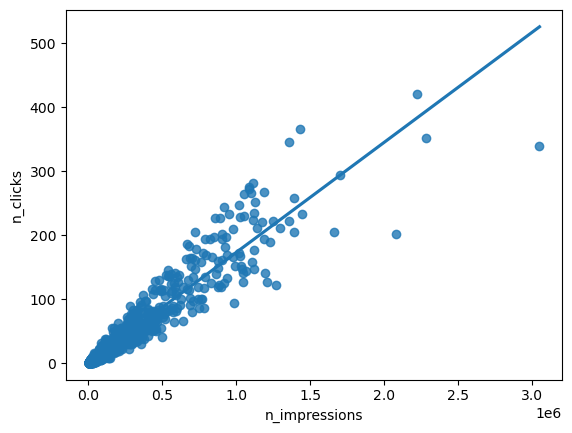

In [3]:
sns.regplot(x = "n_impressions" , y = "n_clicks" , data = ad_conversion, ci = None)
plt.show()

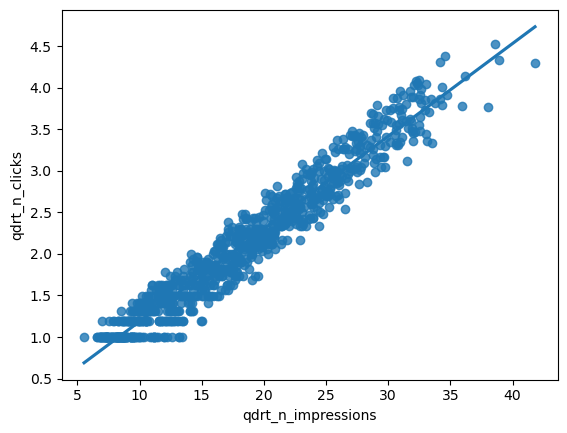

In [4]:
ad_conversion["qdrt_n_impressions"] = ad_conversion["n_impressions"] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion["n_clicks"] ** 0.25
sns.regplot(x = "qdrt_n_impressions" , y = "qdrt_n_clicks" , data=ad_conversion , ci = None)
plt.show()

In [5]:
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data = ad_conversion).fit()
print(mdl_click_vs_impression.params)

Intercept             0.071748
qdrt_n_impressions    0.111533
dtype: float64


In [6]:
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0,3000000 , 500000) **0.25, "n_impressions": np.arange(0, 3000000, 500000)})
explanatory_data

,qdrt_n_impressions,n_impressions
0,0.000000,0
1,26.591479,500000
2,31.622777,1000000
3,34.996355,1500000
4,37.606031,2000000
5,39.763536,2500000


In [7]:
prediction_data = explanatory_data.assign(qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data))
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000              0       0.071748
1           26.591479         500000       3.037576
2           31.622777        1000000       3.598732
3           34.996355        1500000       3.974998
4           37.606031        2000000       4.266063
5           39.763536        2500000       4.506696


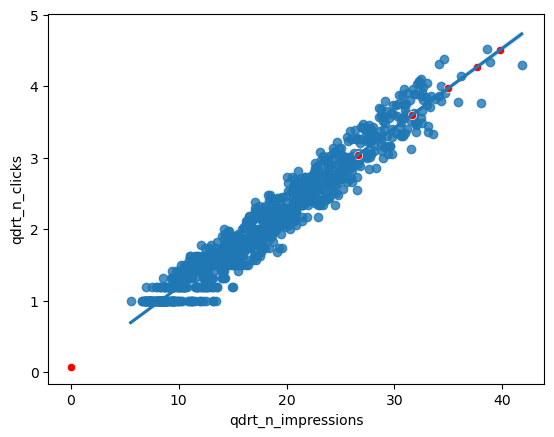

In [8]:
sns.regplot(x = "qdrt_n_impressions" , y = "qdrt_n_clicks" , data = ad_conversion)
sns.scatterplot(x = "qdrt_n_impressions" , y = "qdrt_n_clicks" , data = prediction_data , color = 'red')
plt.show()

In [9]:
prediction_data['n_clicks'] = prediction_data["qdrt_n_clicks"] ** 4
prediction_data

,qdrt_n_impressions,n_impressions,qdrt_n_clicks,n_clicks
0,0.000000,0,0.071748,0.000026
1,26.591479,500000,3.037576,85.135121
2,31.622777,1000000,3.598732,167.725102
3,34.996355,1500000,3.974998,249.659131
4,37.606031,2000000,4.266063,331.214159
5,39.763536,2500000,4.506696,412.508546


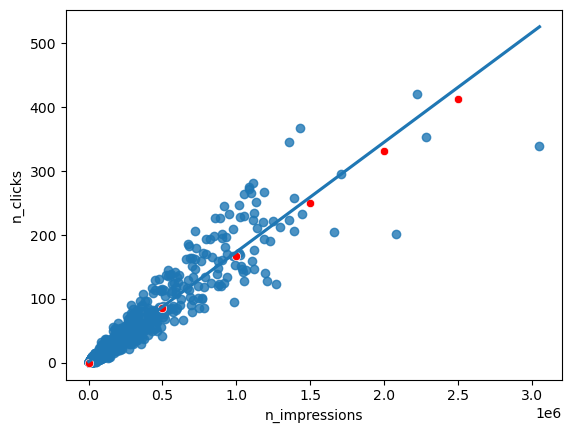

In [10]:
sns.regplot(x = "n_impressions" , y = "n_clicks" , data = ad_conversion, ci = None)
sns.scatterplot(x = "n_impressions" , y = "n_clicks" , data = prediction_data, color = 'red')
plt.show()

In [11]:
print(mdl_click_vs_impression.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:36:18   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [12]:
print("R_SQUARE: " ,mdl_click_vs_impression.rsquared)

R_SQUARE:  0.9445272817143905


In [13]:
mse = mdl_click_vs_impression.mse_resid
print('mse: ', mse)
rse = np.sqrt(mse)
print("rse: ", rse)

mse:  0.03877213389297149
rse:  0.19690640896875725
